In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

y = b0 + b1*x1 - Simple Linear regression

X1 = TV

X2 = Radio

X3 = NewsPaper

y = b0 + b1 * x1 + b2 * x2 + b3 * x3

## Read Dataset

In [3]:
df = pd.read_csv ("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
import missingno as msno

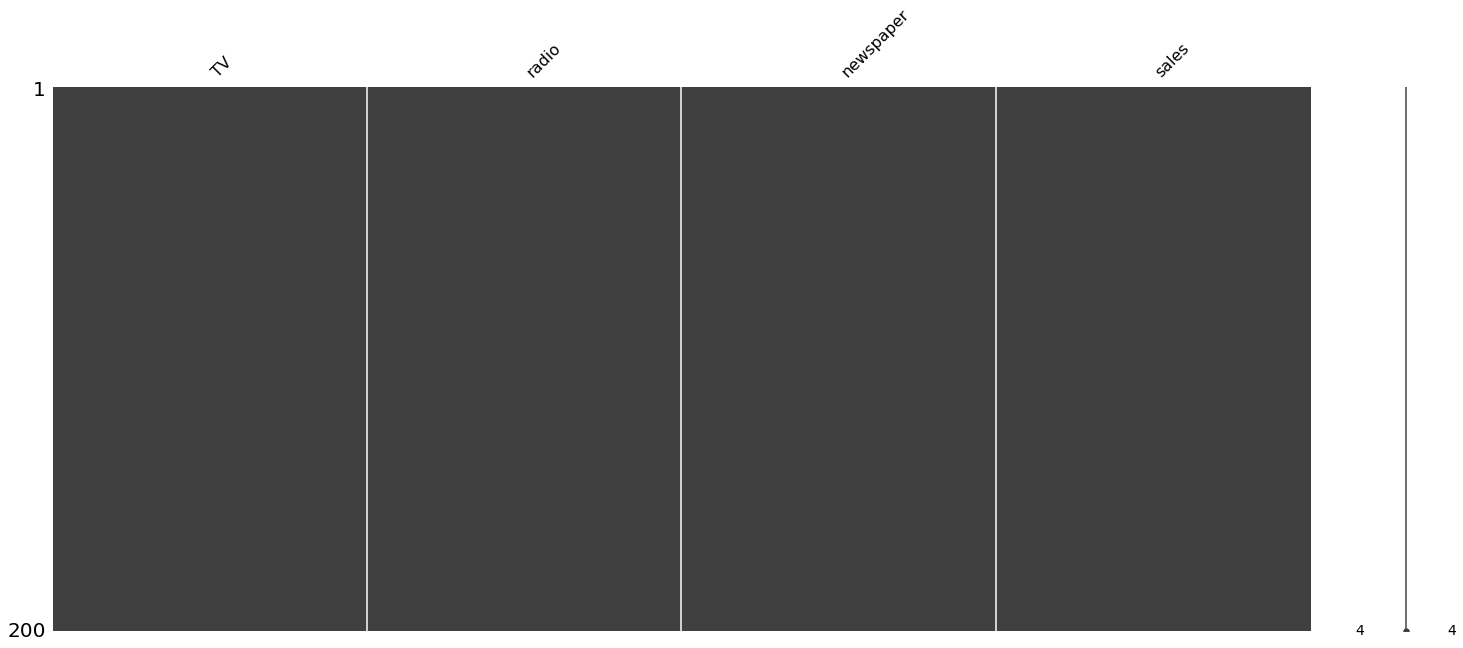

In [8]:
msno.matrix(df);

In [9]:
df.sort_values(by = "sales", ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Outlier için örnek

In [11]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [12]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [13]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


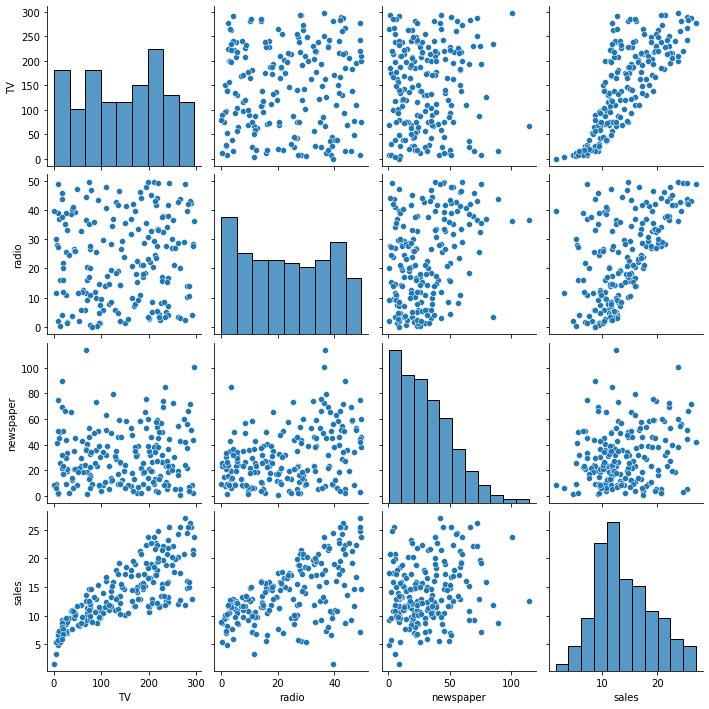

In [14]:
sns.pairplot(df);

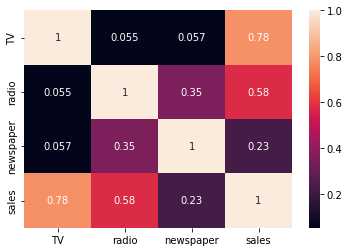

In [15]:
sns.heatmap(df.corr(), annot = True);

In [16]:
from scipy.stats import skew

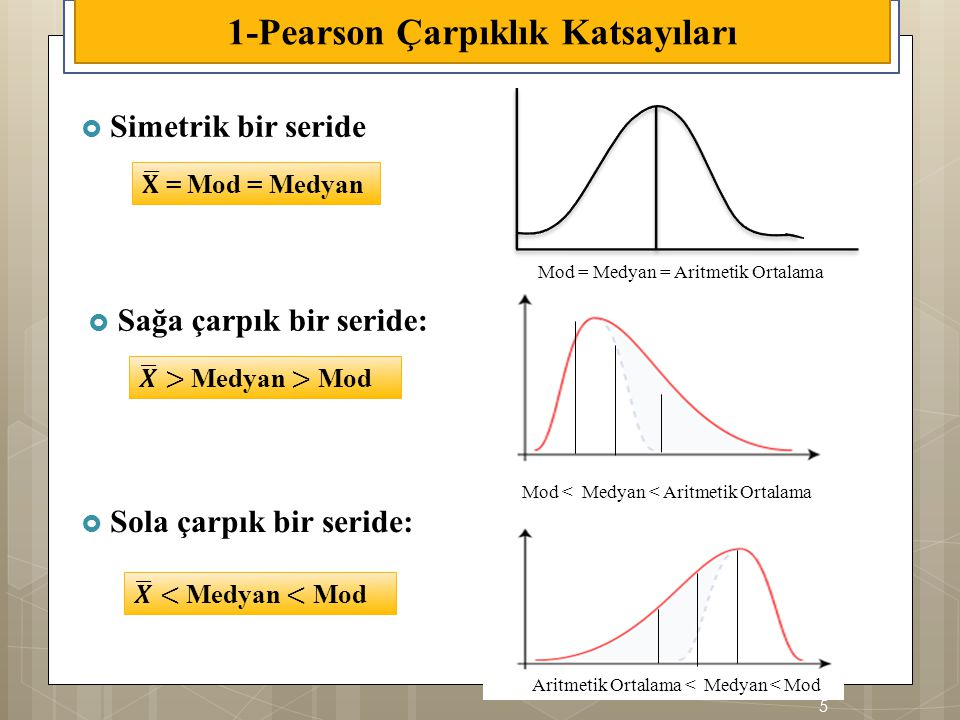

In [17]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


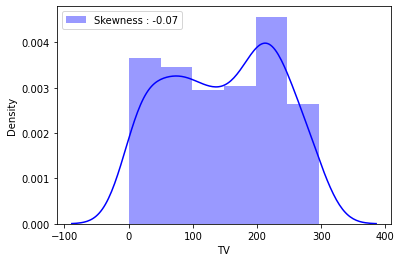

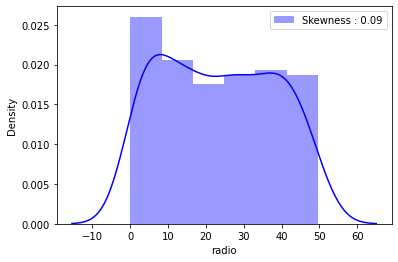

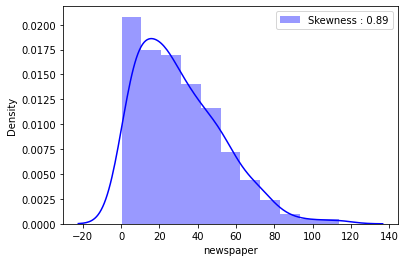

In [18]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

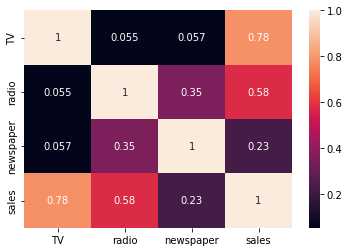

In [19]:
sns.heatmap(df.corr(), annot = True);

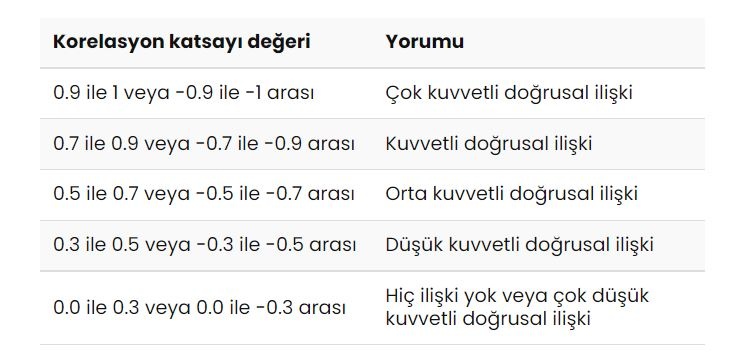

In [20]:
# Tv- sales : Kuvvetli doğrusal ilişiki
# Radio-sales: Orta Kuvvetli doğrusal ilişiki
# Newspaper -sales : Çok düşük doğrusal ilişiki

## Train - Test Split

Data 1000'e kadar (row 1000'e kadarsa) %70 Train, %30 Test (Train için En düşük bu olmalı)

Data 1000 - 100.000 ler arasında ise %90-80 Train %10-20 Test

Data 100.000 - 1.000.000 lar arasında ise %95 Train %5 Test

Data milyonlar üzerinde ise %99 Train, %1 Test olarak bölünse iyi olur

In [21]:
X = df.drop(columns = "sales") # Features ve Target ayrıldı

y = df["sales"]

In [22]:
print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

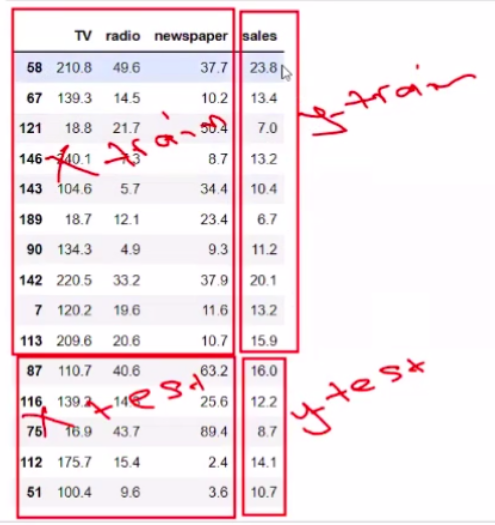

In [25]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
y Test features shape : (60,)


In [26]:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [27]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [28]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [29]:
from sklearn.linear_model import LinearRegression #as model olur fakat literatür bu şekilde fromla başlayan hiç bir syntax as ile devam etmez

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [33]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [34]:
model.intercept_

2.7089490925159065

y_pred = b3*TV + b2*radio + b1*newspaper + b0

In [35]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [36]:
my_dict = {"Actual": y_test, "pred":y_pred, "residual": y_test-y_pred}

In [37]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [38]:
result_sample = comparing.sample(25)
result_sample

,Actual,pred,residual
30,21.4,21.551071,-0.151071
18,11.3,9.969194,1.330806
182,8.7,6.525428,2.174572
173,11.7,11.631569,0.068431
82,11.3,10.295829,1.004171
38,10.1,10.170454,-0.070454
148,10.9,12.496389,-1.596389
114,14.6,15.718484,-1.118484
84,21.7,20.917595,0.782405
140,10.9,9.419571,1.480429


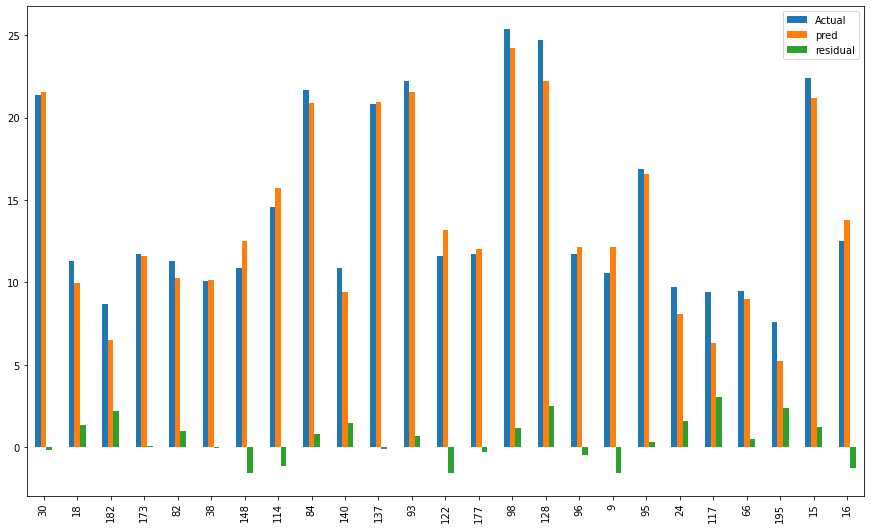

In [39]:
result_sample.plot(kind="bar", figsize = (15, 9));

## Error Metrics

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549086

In [43]:
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

1.9485372043446387

In [45]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [46]:
mae / sales_mean   #MAE göre yaklaşık olarak %11 kayıp var 

0.10780311802138767

In [47]:
rmse / sales_mean   #RMSE göre yaklaşık olarak %14 kayıp var 

0.138957903679418

## Adjusted R2 Score (Düzenlenmiş R2 Skor)

In [48]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [49]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [50]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = 100 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [51]:
adj_r2(y_test, y_pred, df)

0.7204887223614578

## What is the concept of punishment for RMSE error metric?

In [52]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} ## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [53]:
variables, variables2

({'Actual': [1000, 2000, 3000, 4000, 5000],
  'pred': [1100, 2200, 3200, 4200, 5300]},
 {'Actual': [1000, 2000, 3000, 4000, 5000],
  'pred': [1100, 2200, 3200, 4200, 5800]})

In [54]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [55]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [56]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [57]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)

df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [58]:
df_2.residual.sum() / 5 # Residualleri topla gözlem sayısına böl

200.0

In [59]:
df_3.residual.sum() / 5

300.0

In [60]:
((df_2.residual ** 2).sum() / 5) ** 0.5 # residullerin karsini al topla gözlem sayısına böl ve karakökünü al

209.76176963403032

In [61]:
((df_3.residual ** 2).sum() / 5) ** 0.5

392.42833740697165

## Evaluation Model

In [62]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [63]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [64]:
y_train_pred = model.predict(X_train)

In [65]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072526
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

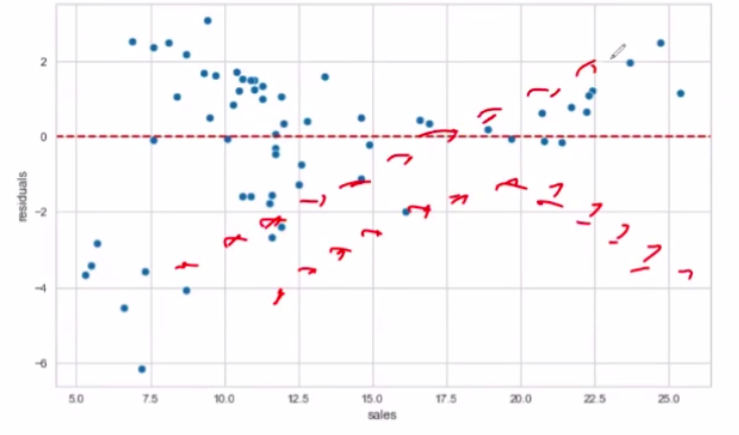

In [66]:
residual = y_test - y_pred

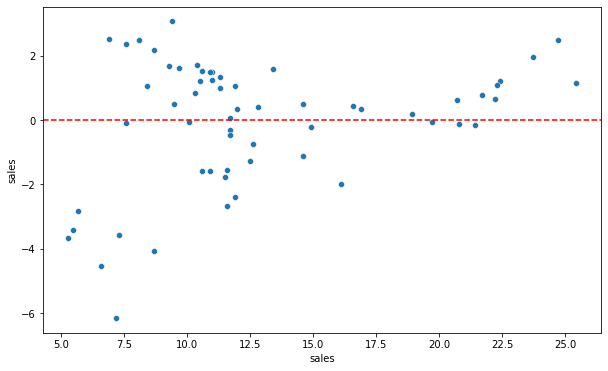

In [69]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x= y_test, y = residual)
plt.axhline(y = 0, color = "r", linestyle = "--");

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

Linear modele kararvermek için makale

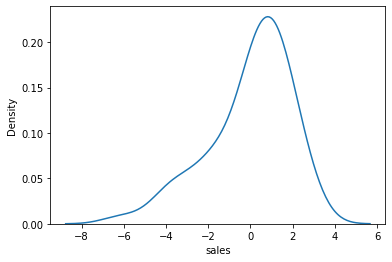

In [70]:
sns.kdeplot(residual);

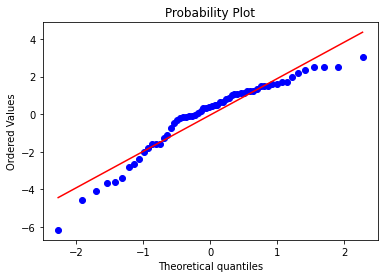

In [72]:
stats.probplot(residual, dist ="norm", plot = plt);

In [73]:
from yellowbrick.regressor import ResidualsPlot

Residual Plot

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

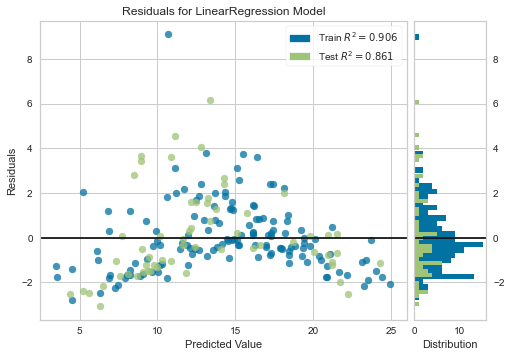

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [74]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [75]:
from yellowbrick.regressor import PredictionError

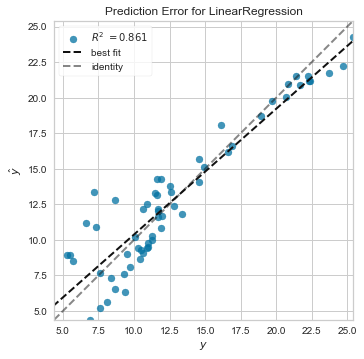

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()    

## Retraining Model on Full Data

In [78]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [96]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [97]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficant"])

In [81]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [95]:
final_model.intercept_

2.938889369459412

In [83]:
coeff_df

,Coefficant
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [98]:
adv = [[150, 20, 15]]

In [99]:
final_model.predict(adv)

array([13.55862413])

In [100]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [101]:
final_model.intercept_

2.938889369459412

In [104]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [105]:
adv2 = [[150, 20, 15], [160, 20, 15]]

In [106]:
final_model.predict(adv2)

array([13.55862413, 14.01627059])

In [107]:
14.01627059 - 13.55862413

0.4576464599999994